# Регрессия. Определение
Термин «регрессия» был придуман сэром Фрэнсисом Гальтоном в конце 19 века. Он использовал этот термин для описания феномена детского роста, имеющего тенденцию к регрессии к среднему значению населения, что означает, что родители выше среднего, как правило, имеют детей, которые ближе к среднему росту, а родители ниже среднего, как правило, имеют детей, которые ближе к среднему росту.

Что такое регрессионный анализ?
Регрессионный анализ — это статистический процесс оценки отношений между зависимыми переменными или переменными-критериями и одной или несколькими независимыми переменными или предикторами. Регрессионный анализ обычно используется, когда мы имеем дело с набором данных, который имеет целевую переменную в виде непрерывных данных. Регрессионный анализ объясняет изменения в критериях или изменения в выбранных предикторов. Условное ожидание критериев основано на предикторах, где среднее значение зависимых переменных задано при изменении независимых переменных. Регрессионный анализ используется в трех основных направлениях использования: определение силы предикторов, прогнозирование эффекта и прогнозирование трендов.

Типы методов регрессии
Существует несколько типов методов регрессии, каждый из которых подходит для различных типов данных и различных типов отношений.
В регрессии используются два типа переменных: независимые переменные и зависимая переменная. Независимые переменные являются входными данными для регрессионной модели, в то время как зависимая переменная — это выходные данные, которые модель пытается предсказать.

Основными методами регрессии являются:

1. Линейная регрессия
1. Полиномиальная регрессия
1. Ступенчатая регрессия
1. Регрессия дерева принятия решений
1. Регрессия случайного леса
1. Регрессия опорных векторов
1. Регрессия хребта
1. Регрессия лассо
1. Регрессия ElasticNet
1. Байесовская линейная регрессия



Регрессия является мощным инструментом для понимания и прогнозирования взаимосвязей между переменными. Он используется в самых разных областях, включая финансы, экономику, маркетинг и медицину.

Существует два основных типа регрессии —  линейная регрессия и логистическая регрессия. Линейная регрессия используется для прогнозирования непрерывного числового результата. Логистическая регрессия используется для прогнозирования двоичного категориального результата, то есть логистическая регрессия - это классификатор!


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Вычисление "скорректировнного R2"
    # Сначала вычислим коэффициент детерминации R2
    r2 = model.score(X_test, y_test)
    # Размер тестовой выборки
    n = X_test.shape[0]
    # Количество признаков
    p = X_test.shape[1]
    # Вычислим "Скорректировнный R2"
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

# Линейная регрессия



In [ ]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Для 4 лабораторной работы использовался другой датафрейм. В данной работе прогнозируется принадлежность музыкального трека к определенному жанру, данные были нормализованы и предопработаны в этих работах:

1 - Нормализация) https://colab.research.google.com/drive/1w-15Dj6UWN5-X3LCuYrEFAXC8fLUEhlu?usp=sharing

2 - Отбрасывание столбцов по важности и избавление от выбросов)https://colab.research.google.com/drive/1ZoxEbFRphSvCbZ7lUAqN-H-MNca-b9MO?usp=sharing


In [ ]:
# используем Pandas read_csv():
# для 4 лабораторной работы использовался другой датафрейм

dataset = pd.read_csv('/content/Spotifyy2.csv')

In [ ]:
dataset.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
dataset.isnull().sum()

,0
artists,0
acousticness,0
valence,0
mmpopularity,0
track_genre,0


In [ ]:
# выведем названия фич
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8521 entries, 0 to 8520
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artists       8521 non-null   int64  
 1   acousticness  8521 non-null   float64
 2   valence       8521 non-null   float64
 3   mmpopularity  8521 non-null   float64
 4   track_genre   8521 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 333.0 KB


In [ ]:
print(dataset.track_genre.unique())

[0 1 2 3 4 5 6 7 8]


In [ ]:
dataset.track_genre.value_counts()

,count
track_genre,
7,989
0,985
1,985
2,982
3,980
6,978
5,960
4,905
8,757


Удаляем жанр под номером 8, чтобы сделать набор равномерным

In [ ]:

dataset = dataset[dataset.track_genre != 8]
print(dataset.track_genre.unique())

[0 1 2 3 4 5 6 7]


In [ ]:
dataset.track_genre.value_counts()

,count
track_genre,
7,989
0,985
1,985
2,982
3,980
6,978
5,960
4,905


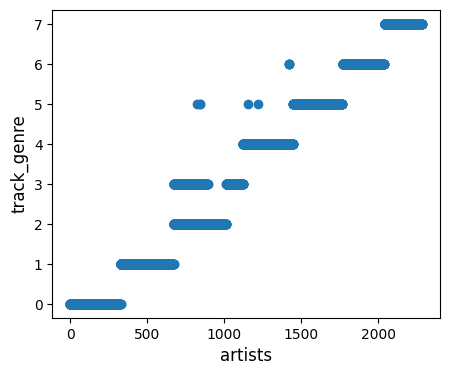

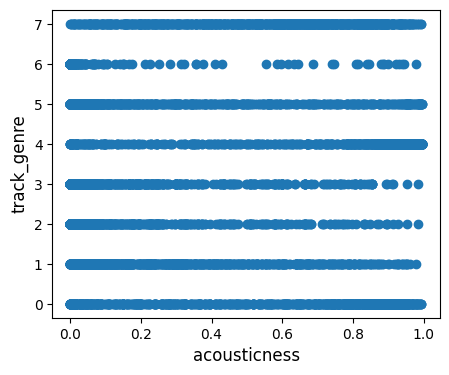

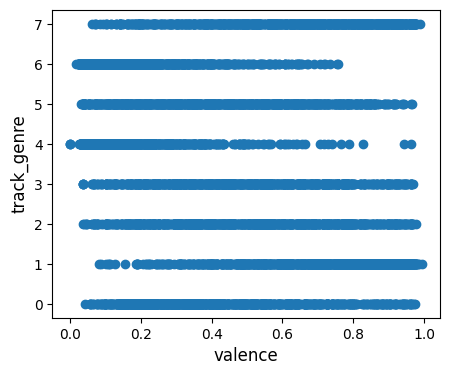

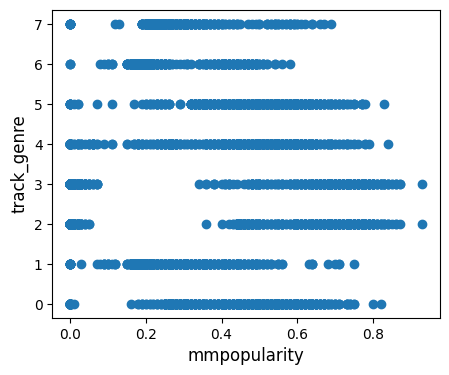

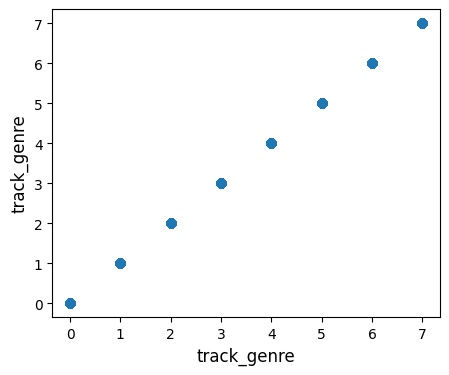

In [ ]:
# нарисуем диаграммы рассеяния, чтобы лучше понять, как признаки (фичи) связаны с целевой переменной

for index, feature_name in enumerate(dataset.columns):
    plt.figure(figsize=(5, 4))
    plt.scatter(dataset[feature_name], dataset["track_genre"])
    plt.ylabel('track_genre', size=12)
    plt.xlabel(feature_name, size=12)
    plt.show()

In [ ]:
# загружаем данные в pandas dataframe
df = dataset

In [ ]:
# подготавливаем датасет к обучению

X = df.drop(['track_genre'], axis=1)
y = df['track_genre']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (7764, 4) | y shape: (7764,) 


In [ ]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

# Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)


RMSE:  0.3961
  R2: 0.9707
 Adjusted R2: 0.9706
 Cross Validated R2: 0.9711


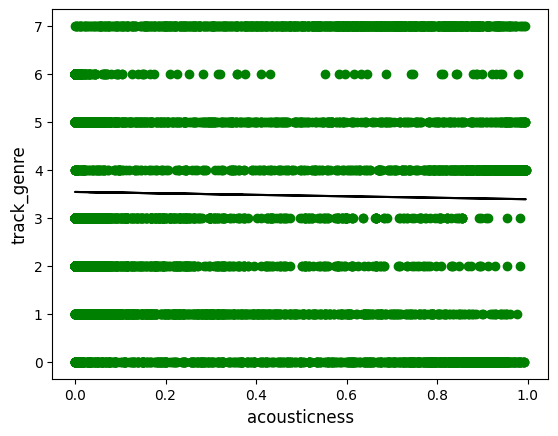

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['acousticness'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['track_genre'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('track_genre', size=12)
plt.xlabel('acousticness', size=12)
plt.show()



# Полиномиальная регрессия


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [ ]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  0.3711
  R2: 0.9746
 Adjusted R2: 0.9742
 Cross Validated R2: 0.9744


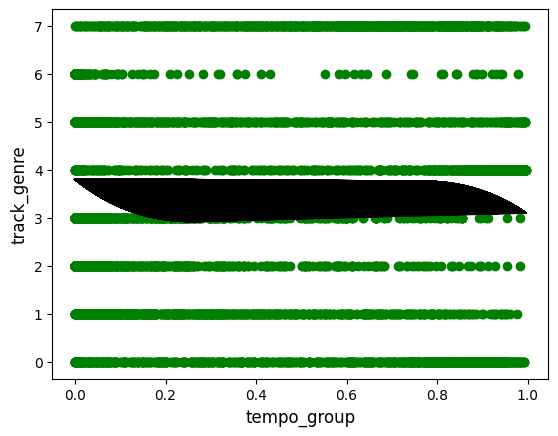

In [ ]:
X2 = df['acousticness'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['track_genre'].values


poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('track_genre', size=12)
plt.xlabel('tempo_group', size=12)
plt.show()


# Регрессия дерева принятия решений


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  0.3464
  R2: 0.9776
 Adjusted R2: 0.9775
 Cross Validated R2: 0.977


# Регрессия случайного леса


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.2949
  R2: 0.9838
 Adjusted R2: 0.9837
 Cross Validated R2: 0.9838


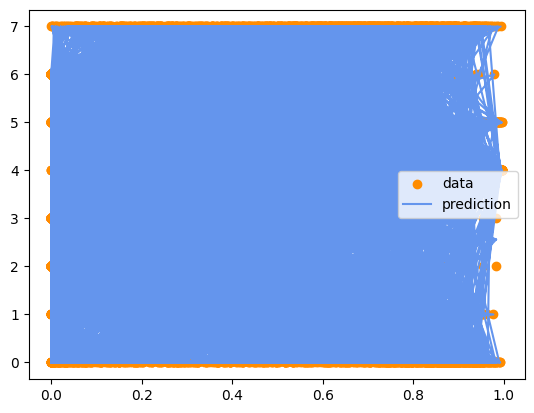

In [ ]:
plt.scatter(X_train["acousticness"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["acousticness"], modelRF.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия опорных векторов (SVR)


In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  0.3988
  R2: 0.9703
 Adjusted R2: 0.9702
 Cross Validated R2: 0.9707


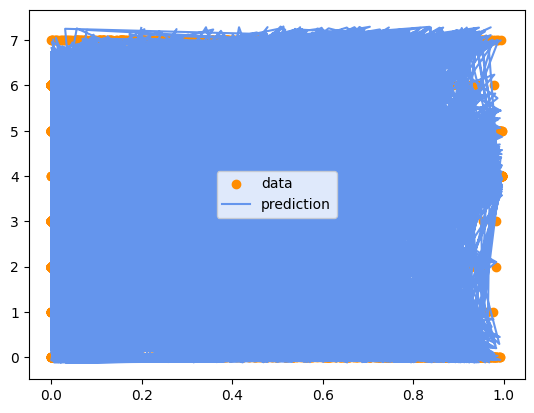

In [ ]:
plt.scatter(X_train["acousticness"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["acousticness"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet




In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  0.3972
  R2: 0.9705
 Adjusted R2: 0.9705
 Cross Validated R2: 0.9706


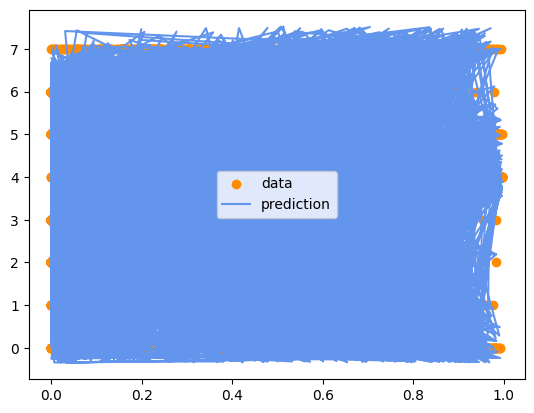

In [ ]:
plt.scatter(X_train["acousticness"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["acousticness"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Задание

Попробовать методы регрессии на своих наборах данных.
Работа будет засчитана, если коэффициент детерминации будет не меньше, чем 0.85.
Чтобы достигнуть этой метрики вам понадобится:
1. загрузить данные
1. проанализировать их
1. предобработать данные
1. попробовать разные методы регрессии
1. получить метрики
1. визуализировать регрессию на одном из параметров

Лучше всего показала себя регрессия случайного леса